# Fasttext Embedding + LSTM

In [4]:
import time
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, f1_score
from torch.optim import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
from gensim.models import FastText
import gensim.downloader as api


# Hyperparameters and Configuration
class Config:
    batch_size = 32
    hidden_size = 256
    embedding_dim = 300  # FastText embedding dimension
    num_epochs = 75
    lr = 1e-3
    hidden_dropout_prob = 0.3
    seed = 11711
    num_labels = 8  # Number of classes
    checkpoint_path = "/kaggle/working/best_lstm_model.pt"  # Path to save and load checkpoint

# Fix random seed for reproducibility
def seed_everything(seed=11711):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(Config.seed)

# Load the pre-trained FastText model
fasttext_model = api.load("fasttext-wiki-news-subwords-300")  # This downloads a 300-dimensional FastText embedding

# Build word index and embedding matrix
vocab_size = len(fasttext_model.key_to_index) + 1
embedding_dim = fasttext_model.vector_size
embedding_matrix = np.zeros((vocab_size, embedding_dim))
word_index = {}
for i, word in enumerate(fasttext_model.index_to_key):
    word_index[word] = i + 1
    embedding_matrix[i + 1] = fasttext_model[word]

        

[=================================================-] 99.5% 953.5/958.4MB downloaded


No checkpoint found. Starting training from scratch.


Training Epoch 1/75: 100%|██████████| 362/362 [00:13<00:00, 26.13it/s]


Epoch 1 | Train Loss: 2.0335 | Train Acc: 0.1777 | Val Acc: 0.1840
Checkpoint saved.


Training Epoch 2/75: 100%|██████████| 362/362 [00:13<00:00, 27.12it/s]


Epoch 2 | Train Loss: 2.0240 | Train Acc: 0.1793 | Val Acc: 0.1833


Training Epoch 3/75: 100%|██████████| 362/362 [00:13<00:00, 27.45it/s]


Epoch 3 | Train Loss: 2.0159 | Train Acc: 0.1837 | Val Acc: 0.1784


Training Epoch 4/75: 100%|██████████| 362/362 [00:13<00:00, 27.30it/s]


Epoch 4 | Train Loss: 2.0056 | Train Acc: 0.1879 | Val Acc: 0.1875
Checkpoint saved.


Training Epoch 5/75: 100%|██████████| 362/362 [00:13<00:00, 27.12it/s]


Epoch 5 | Train Loss: 2.0007 | Train Acc: 0.1916 | Val Acc: 0.1868


Training Epoch 6/75: 100%|██████████| 362/362 [00:13<00:00, 27.14it/s]


Epoch 6 | Train Loss: 1.9982 | Train Acc: 0.1911 | Val Acc: 0.1624


Training Epoch 7/75: 100%|██████████| 362/362 [00:13<00:00, 27.77it/s]


Epoch 7 | Train Loss: 1.9899 | Train Acc: 0.1914 | Val Acc: 0.1924
Checkpoint saved.


Training Epoch 8/75: 100%|██████████| 362/362 [00:13<00:00, 27.16it/s]


Epoch 8 | Train Loss: 1.9736 | Train Acc: 0.1984 | Val Acc: 0.1875


Training Epoch 9/75: 100%|██████████| 362/362 [00:13<00:00, 27.22it/s]


Epoch 9 | Train Loss: 1.9584 | Train Acc: 0.2082 | Val Acc: 0.1777


Training Epoch 10/75: 100%|██████████| 362/362 [00:13<00:00, 27.20it/s]


Epoch 10 | Train Loss: 1.9604 | Train Acc: 0.2031 | Val Acc: 0.1959
Checkpoint saved.


Training Epoch 11/75: 100%|██████████| 362/362 [00:13<00:00, 27.18it/s]


Epoch 11 | Train Loss: 1.9542 | Train Acc: 0.2080 | Val Acc: 0.1610


Training Epoch 12/75: 100%|██████████| 362/362 [00:13<00:00, 27.17it/s]


Epoch 12 | Train Loss: 1.9391 | Train Acc: 0.2146 | Val Acc: 0.1659


Training Epoch 13/75: 100%|██████████| 362/362 [00:13<00:00, 27.27it/s]


Epoch 13 | Train Loss: 1.9365 | Train Acc: 0.2120 | Val Acc: 0.1854


Training Epoch 14/75: 100%|██████████| 362/362 [00:13<00:00, 27.23it/s]


Epoch 14 | Train Loss: 1.8990 | Train Acc: 0.2289 | Val Acc: 0.1889


Training Epoch 15/75: 100%|██████████| 362/362 [00:13<00:00, 27.21it/s]


Epoch 15 | Train Loss: 1.8750 | Train Acc: 0.2423 | Val Acc: 0.1707


Training Epoch 16/75: 100%|██████████| 362/362 [00:13<00:00, 26.92it/s]


Epoch 16 | Train Loss: 1.8678 | Train Acc: 0.2437 | Val Acc: 0.1784


Training Epoch 17/75: 100%|██████████| 362/362 [00:13<00:00, 27.08it/s]


Epoch 17 | Train Loss: 1.8334 | Train Acc: 0.2546 | Val Acc: 0.1952


Training Epoch 18/75: 100%|██████████| 362/362 [00:13<00:00, 27.06it/s]


Epoch 18 | Train Loss: 1.8470 | Train Acc: 0.2547 | Val Acc: 0.1980
Checkpoint saved.


Training Epoch 19/75: 100%|██████████| 362/362 [00:13<00:00, 27.01it/s]


Epoch 19 | Train Loss: 1.7949 | Train Acc: 0.2743 | Val Acc: 0.1714


Training Epoch 20/75: 100%|██████████| 362/362 [00:13<00:00, 27.13it/s]


Epoch 20 | Train Loss: 1.7867 | Train Acc: 0.2827 | Val Acc: 0.1840


Training Epoch 21/75: 100%|██████████| 362/362 [00:13<00:00, 27.56it/s]


Epoch 21 | Train Loss: 1.9786 | Train Acc: 0.2208 | Val Acc: 0.1812


Training Epoch 22/75: 100%|██████████| 362/362 [00:13<00:00, 27.07it/s]


Epoch 22 | Train Loss: 2.0496 | Train Acc: 0.1766 | Val Acc: 0.1463


Training Epoch 23/75: 100%|██████████| 362/362 [00:13<00:00, 27.08it/s]


Epoch 23 | Train Loss: 2.0852 | Train Acc: 0.1674 | Val Acc: 0.1707


Training Epoch 24/75: 100%|██████████| 362/362 [00:13<00:00, 27.28it/s]


Epoch 24 | Train Loss: 2.0558 | Train Acc: 0.1682 | Val Acc: 0.1707


Training Epoch 25/75: 100%|██████████| 362/362 [00:13<00:00, 27.20it/s]


Epoch 25 | Train Loss: 2.0426 | Train Acc: 0.1702 | Val Acc: 0.1631


Training Epoch 26/75: 100%|██████████| 362/362 [00:13<00:00, 27.34it/s]


Epoch 26 | Train Loss: 2.0282 | Train Acc: 0.1783 | Val Acc: 0.1672


Training Epoch 27/75: 100%|██████████| 362/362 [00:13<00:00, 27.19it/s]


Epoch 27 | Train Loss: 2.0220 | Train Acc: 0.1816 | Val Acc: 0.1631


Training Epoch 28/75: 100%|██████████| 362/362 [00:13<00:00, 27.18it/s]


Epoch 28 | Train Loss: 2.0135 | Train Acc: 0.1736 | Val Acc: 0.1770


Training Epoch 29/75: 100%|██████████| 362/362 [00:13<00:00, 27.23it/s]


Epoch 29 | Train Loss: 2.0011 | Train Acc: 0.1858 | Val Acc: 0.1686


Training Epoch 30/75: 100%|██████████| 362/362 [00:13<00:00, 27.15it/s]


Epoch 30 | Train Loss: 2.0104 | Train Acc: 0.1844 | Val Acc: 0.1875


Training Epoch 31/75: 100%|██████████| 362/362 [00:13<00:00, 27.64it/s]


Epoch 31 | Train Loss: 2.0810 | Train Acc: 0.1766 | Val Acc: 0.1994
Checkpoint saved.


Training Epoch 32/75: 100%|██████████| 362/362 [00:13<00:00, 27.07it/s]


Epoch 32 | Train Loss: 1.9745 | Train Acc: 0.1955 | Val Acc: 0.1693


Training Epoch 33/75: 100%|██████████| 362/362 [00:13<00:00, 27.23it/s]


Epoch 33 | Train Loss: 1.9549 | Train Acc: 0.2099 | Val Acc: 0.1938


Training Epoch 34/75: 100%|██████████| 362/362 [00:13<00:00, 27.13it/s]


Epoch 34 | Train Loss: 1.9735 | Train Acc: 0.2130 | Val Acc: 0.1959


Training Epoch 35/75: 100%|██████████| 362/362 [00:13<00:00, 27.35it/s]


Epoch 35 | Train Loss: 1.9551 | Train Acc: 0.2056 | Val Acc: 0.1756


Training Epoch 36/75: 100%|██████████| 362/362 [00:13<00:00, 27.42it/s]


Epoch 36 | Train Loss: 1.9201 | Train Acc: 0.2369 | Val Acc: 0.1659


Training Epoch 37/75: 100%|██████████| 362/362 [00:13<00:00, 27.18it/s]


Epoch 37 | Train Loss: 2.0534 | Train Acc: 0.1659 | Val Acc: 0.1791


Training Epoch 38/75: 100%|██████████| 362/362 [00:13<00:00, 27.09it/s]


Epoch 38 | Train Loss: 2.0165 | Train Acc: 0.1766 | Val Acc: 0.1505


Training Epoch 39/75: 100%|██████████| 362/362 [00:13<00:00, 27.17it/s]


Epoch 39 | Train Loss: 1.9787 | Train Acc: 0.2097 | Val Acc: 0.2274
Checkpoint saved.


Training Epoch 40/75: 100%|██████████| 362/362 [00:13<00:00, 27.47it/s]


Epoch 40 | Train Loss: 2.0269 | Train Acc: 0.2041 | Val Acc: 0.2344
Checkpoint saved.


Training Epoch 41/75: 100%|██████████| 362/362 [00:13<00:00, 27.15it/s]


Epoch 41 | Train Loss: 1.7968 | Train Acc: 0.3028 | Val Acc: 0.3282
Checkpoint saved.


Training Epoch 42/75: 100%|██████████| 362/362 [00:13<00:00, 27.15it/s]


Epoch 42 | Train Loss: 1.8515 | Train Acc: 0.2846 | Val Acc: 0.2589


Training Epoch 43/75: 100%|██████████| 362/362 [00:13<00:00, 27.17it/s]


Epoch 43 | Train Loss: 1.8991 | Train Acc: 0.2332 | Val Acc: 0.1938


Training Epoch 44/75: 100%|██████████| 362/362 [00:13<00:00, 27.16it/s]


Epoch 44 | Train Loss: 1.8996 | Train Acc: 0.2241 | Val Acc: 0.1645


Training Epoch 45/75: 100%|██████████| 362/362 [00:13<00:00, 27.18it/s]


Epoch 45 | Train Loss: 1.8711 | Train Acc: 0.2413 | Val Acc: 0.1994


Training Epoch 46/75: 100%|██████████| 362/362 [00:13<00:00, 27.09it/s]


Epoch 46 | Train Loss: 1.8230 | Train Acc: 0.2555 | Val Acc: 0.1966


Training Epoch 47/75: 100%|██████████| 362/362 [00:13<00:00, 27.14it/s]


Epoch 47 | Train Loss: 1.7696 | Train Acc: 0.2845 | Val Acc: 0.2141


Training Epoch 48/75: 100%|██████████| 362/362 [00:13<00:00, 27.13it/s]


Epoch 48 | Train Loss: 1.7357 | Train Acc: 0.3112 | Val Acc: 0.2617


Training Epoch 49/75: 100%|██████████| 362/362 [00:13<00:00, 27.29it/s]


Epoch 49 | Train Loss: 1.4713 | Train Acc: 0.4426 | Val Acc: 0.4017
Checkpoint saved.


Training Epoch 50/75: 100%|██████████| 362/362 [00:13<00:00, 27.16it/s]


Epoch 50 | Train Loss: 1.3293 | Train Acc: 0.5010 | Val Acc: 0.4234
Checkpoint saved.


Training Epoch 51/75: 100%|██████████| 362/362 [00:13<00:00, 27.11it/s]


Epoch 51 | Train Loss: 1.2513 | Train Acc: 0.5308 | Val Acc: 0.4367
Checkpoint saved.


Training Epoch 52/75: 100%|██████████| 362/362 [00:13<00:00, 27.15it/s]


Epoch 52 | Train Loss: 1.1917 | Train Acc: 0.5540 | Val Acc: 0.4514
Checkpoint saved.


Training Epoch 53/75: 100%|██████████| 362/362 [00:13<00:00, 27.06it/s]


Epoch 53 | Train Loss: 1.1339 | Train Acc: 0.5737 | Val Acc: 0.4745
Checkpoint saved.


Training Epoch 54/75: 100%|██████████| 362/362 [00:13<00:00, 27.08it/s]


Epoch 54 | Train Loss: 1.1263 | Train Acc: 0.5769 | Val Acc: 0.4353


Training Epoch 55/75: 100%|██████████| 362/362 [00:13<00:00, 27.20it/s]


Epoch 55 | Train Loss: 1.0720 | Train Acc: 0.6008 | Val Acc: 0.4864
Checkpoint saved.


Training Epoch 56/75: 100%|██████████| 362/362 [00:13<00:00, 27.09it/s]


Epoch 56 | Train Loss: 1.0040 | Train Acc: 0.6251 | Val Acc: 0.4773


Training Epoch 57/75: 100%|██████████| 362/362 [00:13<00:00, 27.17it/s]


Epoch 57 | Train Loss: 0.9304 | Train Acc: 0.6491 | Val Acc: 0.4850


Training Epoch 58/75: 100%|██████████| 362/362 [00:13<00:00, 27.13it/s]


Epoch 58 | Train Loss: 0.9366 | Train Acc: 0.6494 | Val Acc: 0.4892
Checkpoint saved.


Training Epoch 59/75: 100%|██████████| 362/362 [00:13<00:00, 27.09it/s]


Epoch 59 | Train Loss: 0.8770 | Train Acc: 0.6727 | Val Acc: 0.4857


Training Epoch 60/75: 100%|██████████| 362/362 [00:13<00:00, 27.11it/s]


Epoch 60 | Train Loss: 0.8027 | Train Acc: 0.6992 | Val Acc: 0.4822


Training Epoch 61/75: 100%|██████████| 362/362 [00:13<00:00, 27.18it/s]


Epoch 61 | Train Loss: 0.7476 | Train Acc: 0.7203 | Val Acc: 0.4689


Training Epoch 62/75: 100%|██████████| 362/362 [00:13<00:00, 27.10it/s]


Epoch 62 | Train Loss: 0.7018 | Train Acc: 0.7386 | Val Acc: 0.4780


Training Epoch 63/75: 100%|██████████| 362/362 [00:13<00:00, 27.28it/s]


Epoch 63 | Train Loss: 0.6661 | Train Acc: 0.7519 | Val Acc: 0.4843


Training Epoch 64/75: 100%|██████████| 362/362 [00:13<00:00, 27.24it/s]


Epoch 64 | Train Loss: 0.6252 | Train Acc: 0.7657 | Val Acc: 0.4773


Training Epoch 65/75: 100%|██████████| 362/362 [00:13<00:00, 27.18it/s]


Epoch 65 | Train Loss: 0.5819 | Train Acc: 0.7811 | Val Acc: 0.4822


Training Epoch 66/75: 100%|██████████| 362/362 [00:13<00:00, 27.06it/s]


Epoch 66 | Train Loss: 0.5431 | Train Acc: 0.7976 | Val Acc: 0.4717


Training Epoch 67/75: 100%|██████████| 362/362 [00:13<00:00, 27.20it/s]


Epoch 67 | Train Loss: 0.5169 | Train Acc: 0.8068 | Val Acc: 0.4584


Training Epoch 68/75: 100%|██████████| 362/362 [00:13<00:00, 27.26it/s]


Epoch 68 | Train Loss: 0.4887 | Train Acc: 0.8221 | Val Acc: 0.4871


Training Epoch 69/75: 100%|██████████| 362/362 [00:13<00:00, 27.23it/s]


Epoch 69 | Train Loss: 0.4463 | Train Acc: 0.8375 | Val Acc: 0.4605


Training Epoch 70/75: 100%|██████████| 362/362 [00:13<00:00, 27.13it/s]


Epoch 70 | Train Loss: 0.4194 | Train Acc: 0.8489 | Val Acc: 0.4682


Training Epoch 71/75: 100%|██████████| 362/362 [00:13<00:00, 27.24it/s]


Epoch 71 | Train Loss: 0.3825 | Train Acc: 0.8646 | Val Acc: 0.4703


Training Epoch 72/75: 100%|██████████| 362/362 [00:13<00:00, 27.42it/s]


Epoch 72 | Train Loss: 0.3763 | Train Acc: 0.8698 | Val Acc: 0.4717


Training Epoch 73/75: 100%|██████████| 362/362 [00:13<00:00, 27.23it/s]


Epoch 73 | Train Loss: 0.3437 | Train Acc: 0.8826 | Val Acc: 0.4759


Training Epoch 74/75: 100%|██████████| 362/362 [00:13<00:00, 27.09it/s]


Epoch 74 | Train Loss: 0.3057 | Train Acc: 0.8954 | Val Acc: 0.4885


Training Epoch 75/75: 100%|██████████| 362/362 [00:13<00:00, 27.19it/s]


Epoch 75 | Train Loss: 0.2778 | Train Acc: 0.9075 | Val Acc: 0.4731


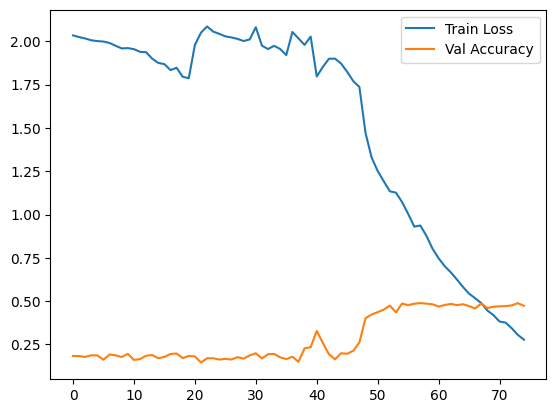

/tmp/ipykernel_24/3263386255.py:156: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(Config.checkpoint_path)['model_state_dict'])


Test Accuracy: 0.4715 | Test F1 Score: 0.4457


In [ ]:
# Load data
def load_data(filename):
    df = pd.read_csv(filename)
    data = [(row['Summary'], row['Genres']) for _, row in df.iterrows()]
    return data

# TextDataset using FastText word indices
class TextDataset(Dataset):
    def __init__(self, data, word_index, label_map, max_length=512):
        self.data = data
        self.word_index = word_index
        self.label_map = label_map
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text, label = self.data[idx]
        # Convert text to word indices
        token_ids = [self.word_index.get(word, 0) for word in text.split()]
        token_ids = token_ids[:self.max_length]  # Truncate if necessary
        token_ids += [0] * (self.max_length - len(token_ids))  # Pad to max length
        return torch.tensor(token_ids, dtype=torch.long), torch.tensor(self.label_map[label], dtype=torch.long)

    def collate_fn(self, batch):
        token_ids = torch.stack([item[0] for item in batch])
        labels = torch.tensor([item[1] for item in batch], dtype=torch.long)
        return token_ids, labels

# Define the LSTM model with FastText embeddings
class LSTMSentClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_matrix, config):
        super(LSTMSentClassifier, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float32), freeze=True)
        self.lstm = nn.LSTM(embedding_matrix.shape[1], config.hidden_size, batch_first=True)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.fc = nn.Linear(config.hidden_size, config.num_labels)
        self.softmax = nn.LogSoftmax(dim=-1)

    def forward(self, x):
        embedded = self.embedding(x)
        _, (hidden, _) = self.lstm(embedded)
        hidden = self.dropout(hidden[-1])
        return self.softmax(self.fc(hidden))

# Evaluation function to calculate accuracy and F1 score
def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for token_ids, labels in dataloader:
            token_ids, labels = token_ids.to(device), labels.to(device)
            output = model(token_ids)
            preds = torch.argmax(output, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average="macro")
    return accuracy, f1

# Training function with checkpoint saving
def train_model(model, train_loader, val_loader, config, device):
    """
    Trains the given model using the provided training and validation data loaders.

    Args:
        model (torch.nn.Module): The model to be trained.
        train_loader (torch.utils.data.DataLoader): DataLoader for the training dataset.
        val_loader (torch.utils.data.DataLoader): DataLoader for the validation dataset.
        config (object): Configuration object containing training parameters such as learning rate, number of epochs, and checkpoint path.
        device (torch.device): The device (CPU or GPU) on which the model will be trained.

    Returns:
        None
    """
    optimizer = Adam(model.parameters(), lr=config.lr)
    start_epoch = 0
    best_accuracy = 0

    # Load checkpoint if it exists
    if os.path.exists(config.checkpoint_path):
        checkpoint = torch.load(config.checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_epoch = checkpoint['epoch'] + 1
        best_accuracy = checkpoint.get('best_accuracy', 0)
        print(f"Checkpoint loaded. Resuming training from epoch {start_epoch} with best accuracy {best_accuracy:.4f}")
    else:
        print("No checkpoint found. Starting training from scratch.")

    train_losses, train_accuracies, val_accuracies = [], [], []

    for epoch in range(start_epoch, config.num_epochs):
        model.train()
        total_loss = 0
        correct_preds = 0
        total_samples = 0

        for token_ids, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{config.num_epochs}"):
            token_ids, labels = token_ids.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(token_ids)
            loss = F.nll_loss(output, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            preds = torch.argmax(output, dim=1)
            correct_preds += (preds == labels).sum().item()
            total_samples += labels.size(0)

        avg_train_loss = total_loss / len(train_loader)
        train_accuracy = correct_preds / total_samples
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        val_accuracy, val_f1 = evaluate_model(model, val_loader, device)
        val_accuracies.append(val_accuracy)
        print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.4f} | Val Acc: {val_accuracy:.4f}")

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'best_accuracy': best_accuracy,
            }, config.checkpoint_path)
            print("Checkpoint saved.")

    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_accuracies, label="Val Accuracy")
    plt.legend()
    plt.show()

# Data processing
label_map = {
    "Children's literature": 0,
    "Crime Fiction": 1,
    "Fantasy": 2,
    "Mystery": 3,
    "Non-fiction": 4,
    "Science Fiction": 5,
    "Suspense": 6,
    "Young adult literature": 7
}

# Load training, validation, and test data
train_data = load_data('/kaggle/input/book-summaries/book_summaries_train.csv')
val_data = load_data('/kaggle/input/book-summaries/book_summaries_valid.csv')
test_data = load_data('/kaggle/input/book-summaries/book_summaries_test.csv')

# Create datasets
train_dataset = TextDataset(train_data, word_index, label_map)
val_dataset = TextDataset(val_data, word_index, label_map)
test_dataset = TextDataset(test_data, word_index, label_map)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=Config.batch_size, shuffle=True, collate_fn=train_dataset.collate_fn)
val_loader = DataLoader(val_dataset, batch_size=Config.batch_size, shuffle=False, collate_fn=val_dataset.collate_fn)
test_loader = DataLoader(test_dataset, batch_size=Config.batch_size, shuffle=False, collate_fn=test_dataset.collate_fn)

# Model setup and training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMSentClassifier(vocab_size, embedding_matrix, Config).to(device)

# Train the model
train_model(model, train_loader, val_loader, Config, device)

# Load the best model and evaluate on the test set
model.load_state_dict(torch.load(Config.checkpoint_path)['model_state_dict'])
test_accuracy, test_f1 = evaluate_model(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.4f} | Test F1 Score: {test_f1:.4f}")